# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#3B3B3B;">House Price Prediction</p>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msn
import seaborn as sns

In [2]:
houses = pd.read_csv('kc_house_data.csv')
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
houses['condition']

0        3
1        3
2        3
3        5
4        3
        ..
21608    3
21609    3
21610    3
21611    3
21612    3
Name: condition, Length: 21613, dtype: int64

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
houses.shape

(21613, 21)

In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

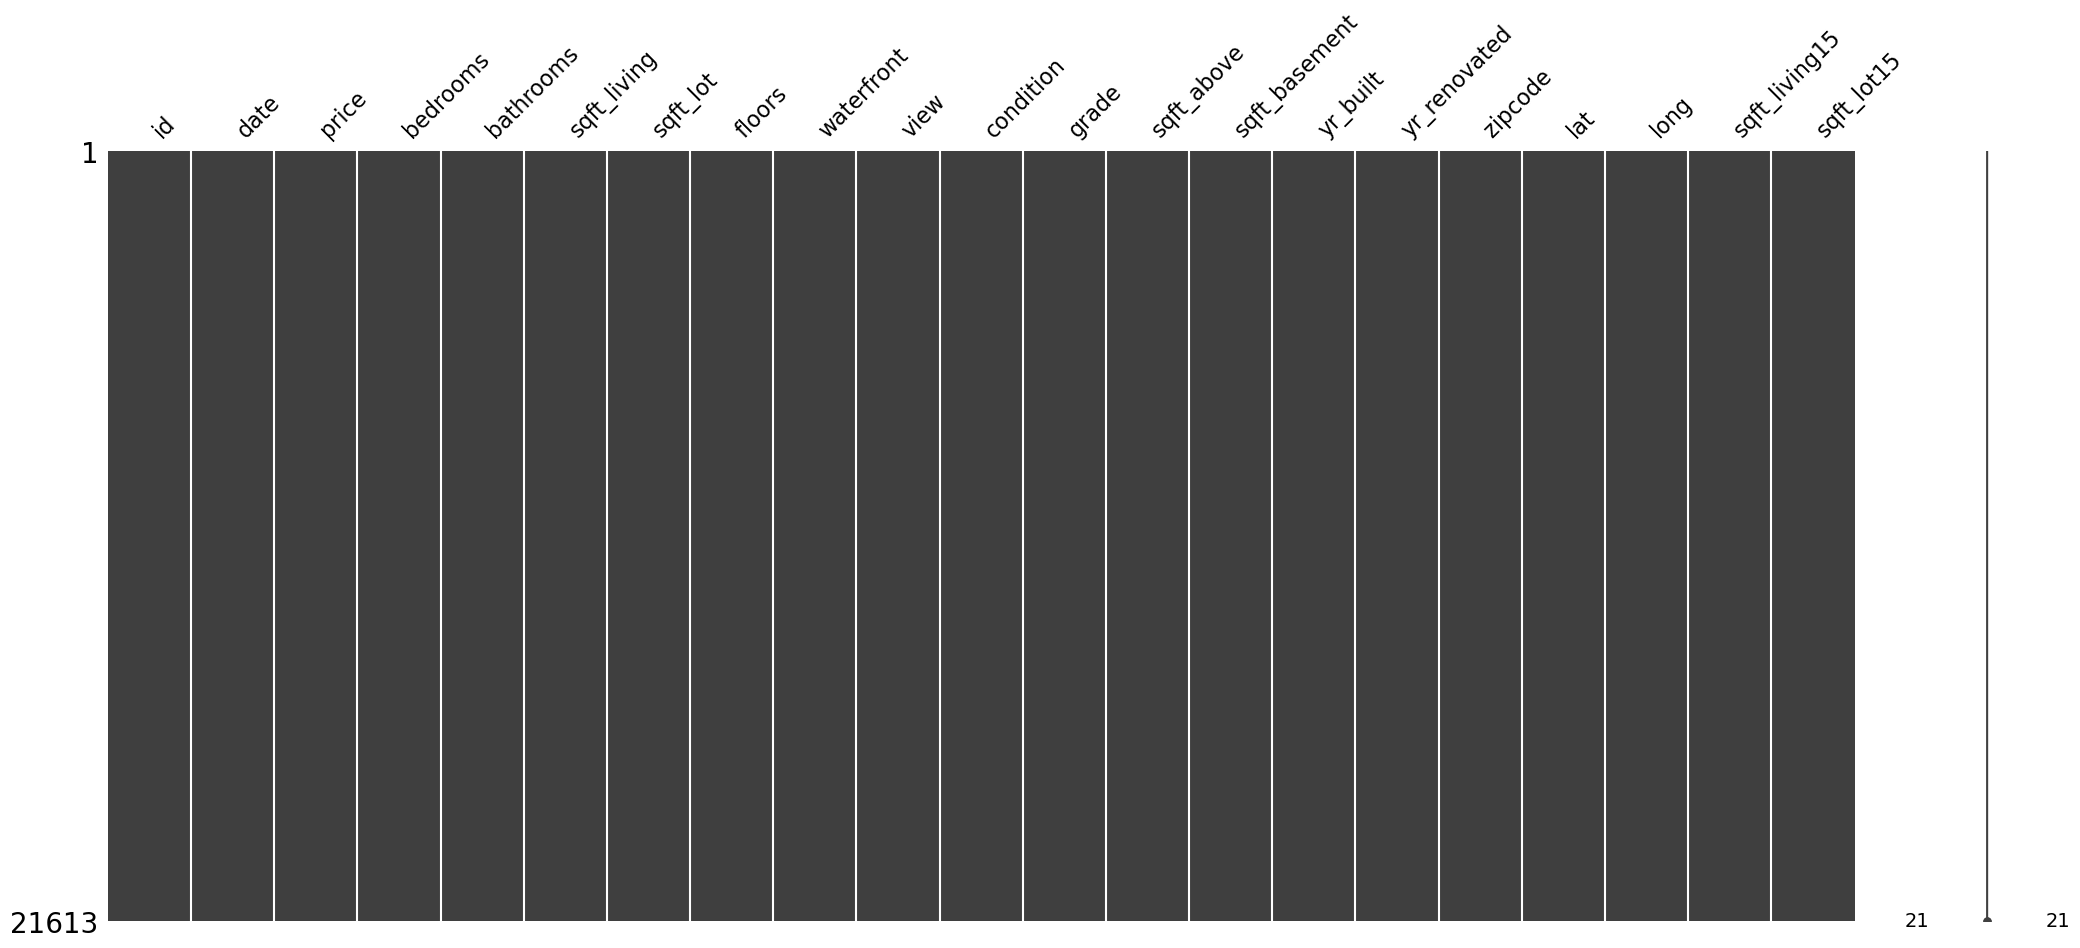

In [8]:
msn.matrix(houses)  # Visualize missing values
plt.show()

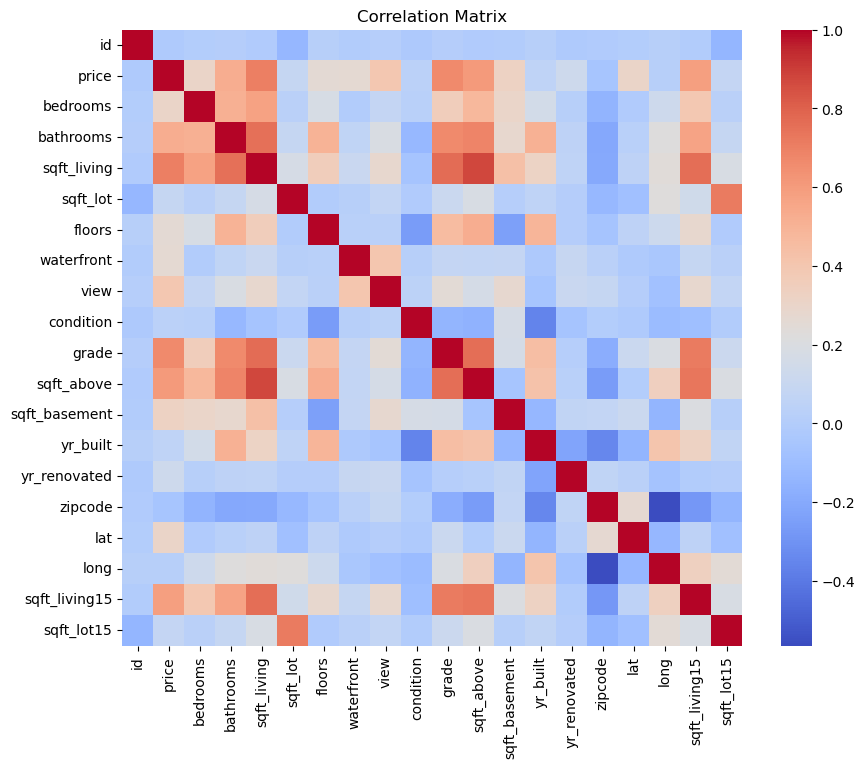

In [9]:
# Calculate the correlation matrix
corr_matrix = houses.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Select features based on correlation with the target variable
target_variable = 'price'  # Replace with your target variable name
threshold = 0.3  # Adjust the threshold as needed

correlated_features = corr_matrix[target_variable].sort_values(ascending=False)
selected_features = correlated_features[correlated_features.abs() > threshold].index.tolist()

# Create a new DataFrame with the selected features
houses_selected = houses[selected_features]

# Now, you can use df_selected for model building

In [11]:
houses_selected

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530,2.50,0,0,3,47.6993
21609,400000.0,2310,8,2310,1830,2.50,0,0,4,47.5107
21610,402101.0,1020,7,1020,1020,0.75,0,0,2,47.5944
21611,400000.0,1600,8,1600,1410,2.50,0,0,3,47.5345


In [12]:
print("Missing Values by Column")
print("-"*30)
print(houses_selected.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",houses_selected.isna().sum().sum())

Missing Values by Column
------------------------------
price            0
sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
bathrooms        0
view             0
sqft_basement    0
bedrooms         0
lat              0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


- price vs. sqft_living: There's a clear positive linear relationship. Larger houses tend to be more expensive.
- price vs. sqft_above: Similar to the previous one, a positive linear relationship is observed.
- sqft_living vs. sqft_above: A strong positive linear relationship, indicating that larger houses tend to have more square footage above ground.
- bathrooms vs. sqft_living: A weak positive relationship, suggesting that larger houses tend to have more bathrooms, but the relationship is not as strong.

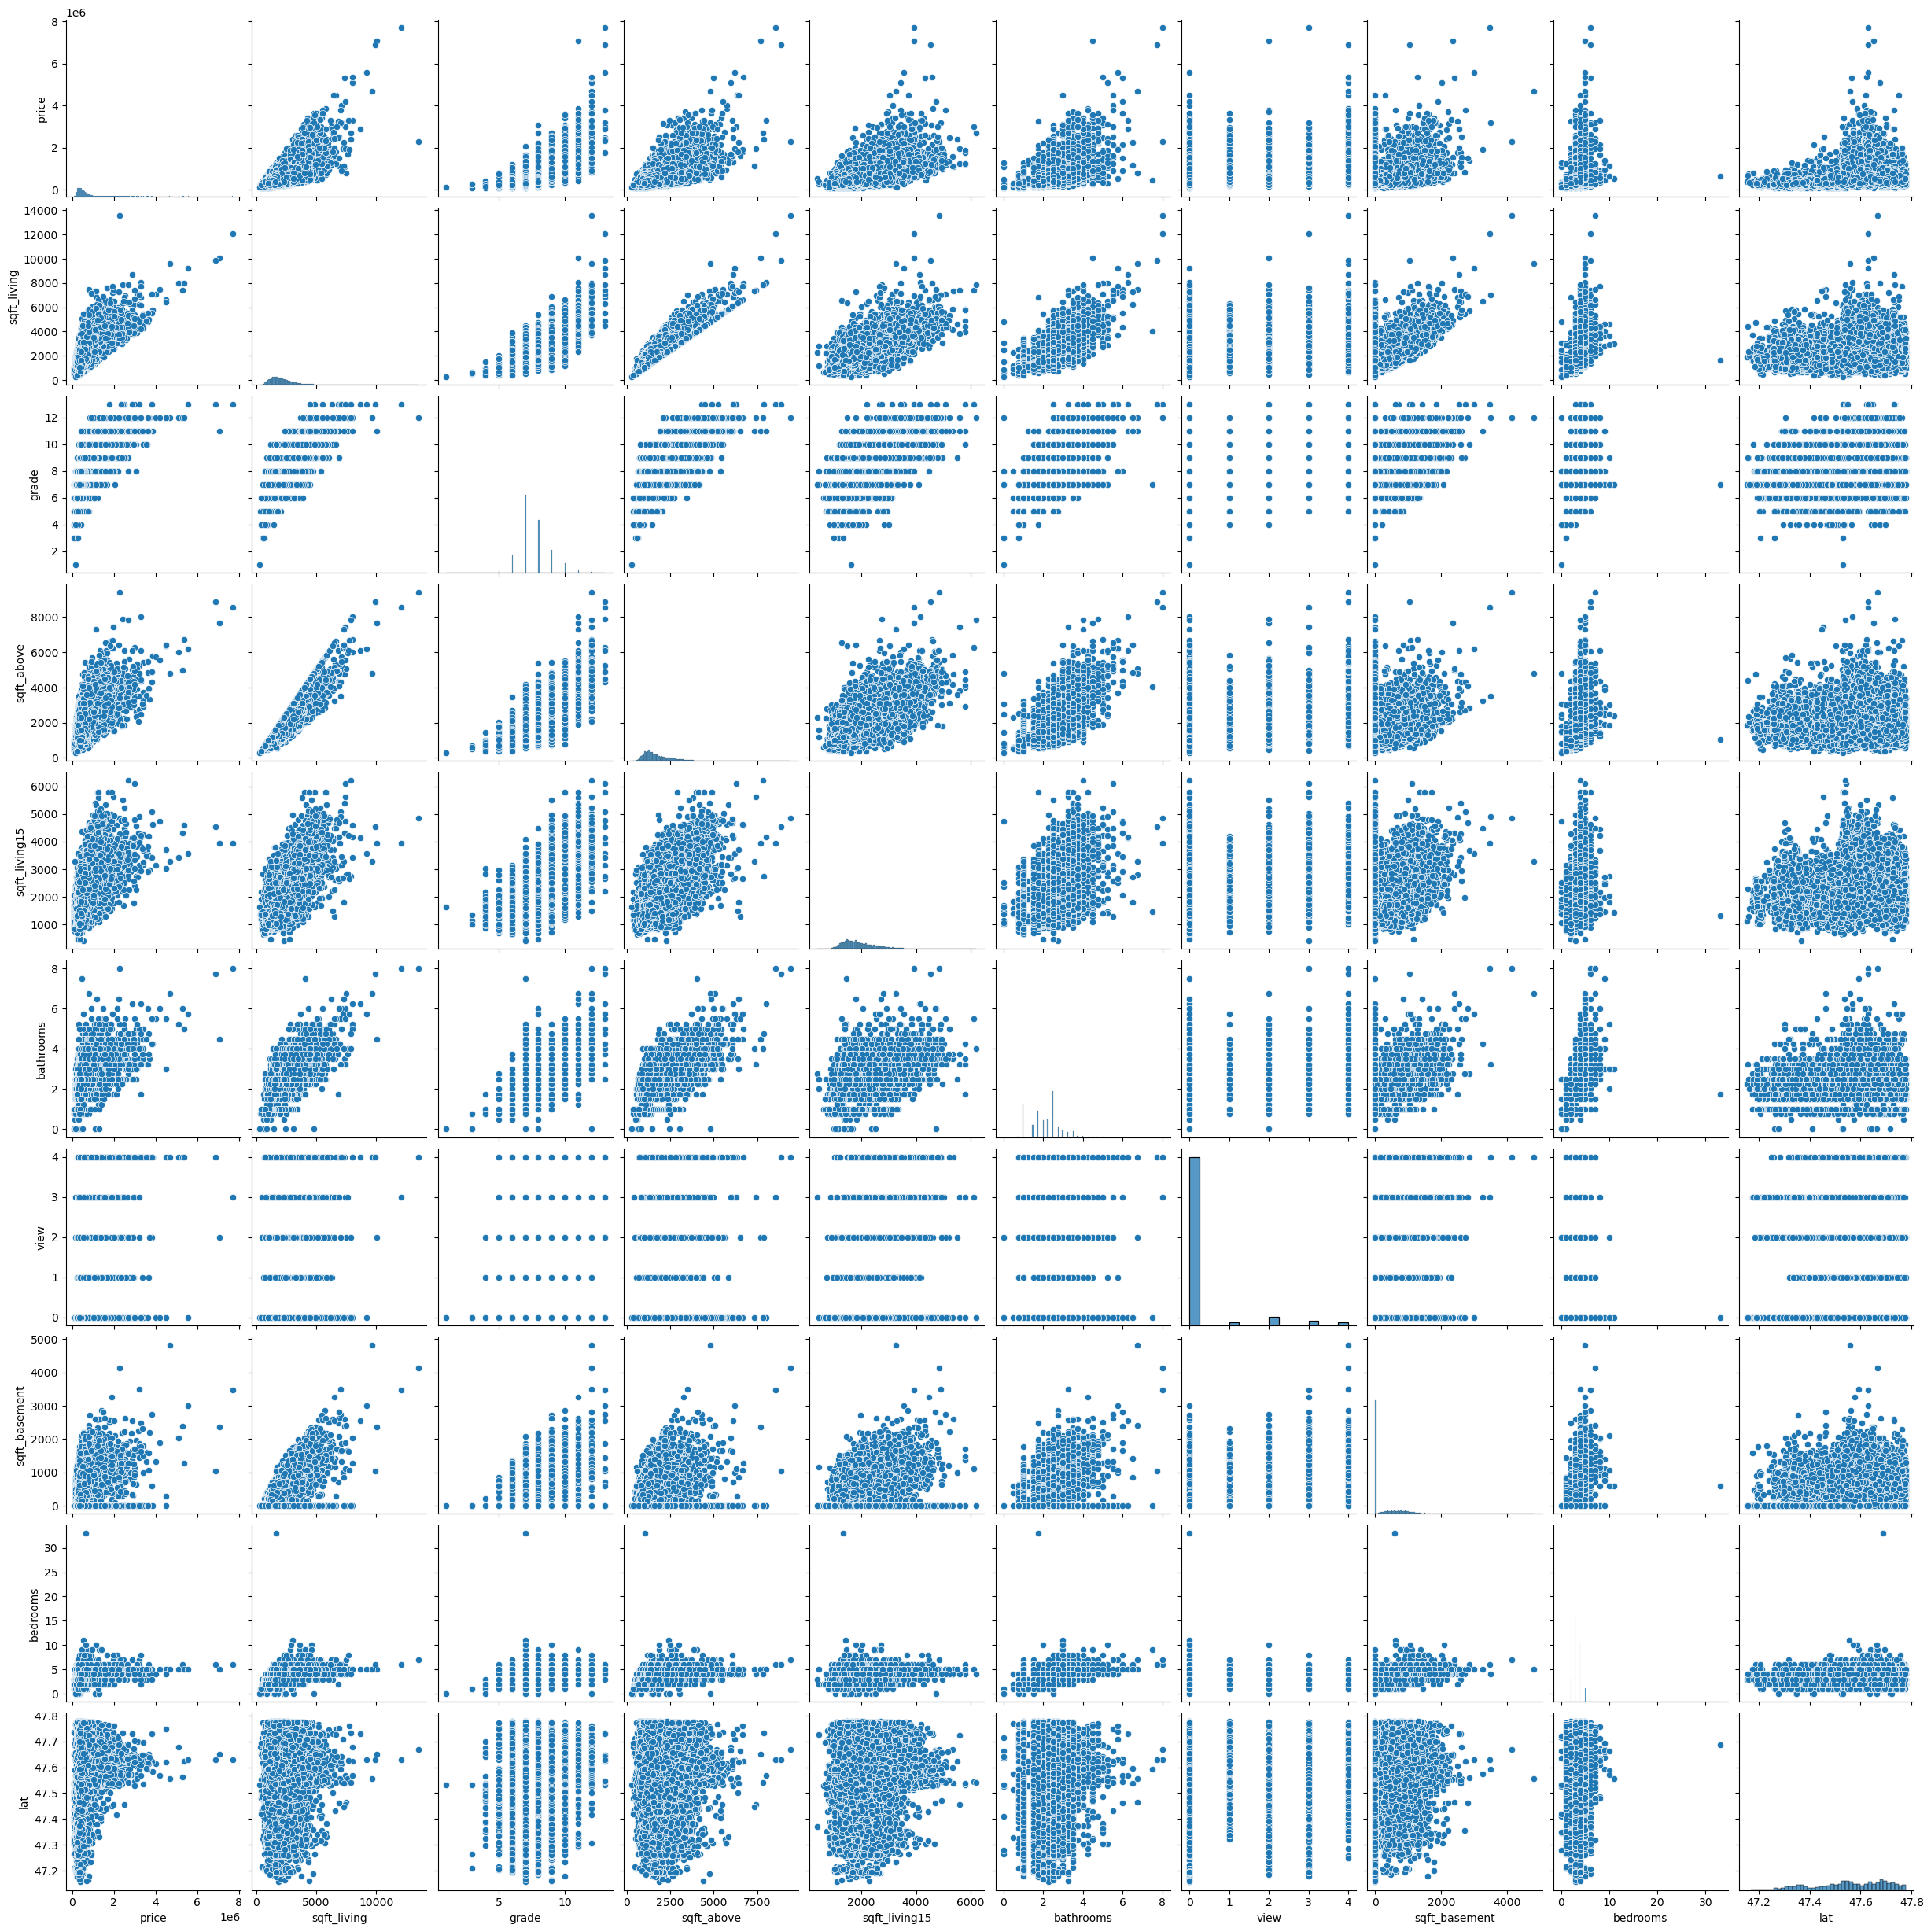

In [13]:
sns.pairplot(houses_selected)

In [14]:
X = houses_selected.drop('price', axis=1)
y = houses_selected['price']

In [15]:
X

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat
0,1180,7,1180,1340,1.00,0,0,3,47.5112
1,2570,7,2170,1690,2.25,0,400,3,47.7210
2,770,6,770,2720,1.00,0,0,2,47.7379
3,1960,7,1050,1360,3.00,0,910,4,47.5208
4,1680,8,1680,1800,2.00,0,0,3,47.6168
...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,1530,2.50,0,0,3,47.6993
21609,2310,8,2310,1830,2.50,0,0,4,47.5107
21610,1020,7,1020,1020,0.75,0,0,2,47.5944
21611,1600,8,1600,1410,2.50,0,0,3,47.5345


In [16]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regressor

In [19]:
from sklearn.linear_model import Ridge
lm_r = Ridge(alpha =10)
lm_r.fit(X_train,y_train)

Ridge(alpha=10)

In [32]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
y_pred_train = lm_r.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R² Score: {r2}")
print(f"Train MAE Score: {mae}")

Train R² Score: 0.6391047424748565
Train MAE Score: 0.26786891098685023


In [21]:
y_pred = lm_r.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {r2}")

Test R² Score: 0.6424978615258543


In [22]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lm_r, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validated R2 scores: [0.61936239 0.633868   0.62711993 0.60904826 0.63901861 0.64192632
 0.64498759 0.64884571 0.64358989 0.6609841 ]
Mean R2 score: 0.6368750800404538


In [23]:
cv_scores = cross_val_score(lm_r, X_test, y_test, cv=10, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validated R2 scores: [0.63185783 0.69069493 0.64361926 0.58092052 0.66892429 0.70002636
 0.64021244 0.61303356 0.64921315 0.61913053]
Mean R2 score: 0.643763287195876


# XGB

In [24]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, alpha=0.1, reg_lambda=1)
xgb.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [34]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
y_pred_train = xgb.predict(X_train)

r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_percentage_error(y_train, y_pred_train)
print(f"Train R² Score: {r2}")
print(f"Train MAPE : {mae}")

Train R² Score: 0.7918773387833966
Train MAE : 0.1982396156209695


In [26]:
y_pred = xgb.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {r2}")

Test R² Score: 0.7692130332132032


In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validated R2 scores: [0.71982141 0.68148431 0.73088155 0.72576714 0.73898    0.71235004
 0.76091395 0.79434345 0.74777029 0.77859567]
Mean R2 score: 0.7390907810113869


In [28]:
cv_scores = cross_val_score(xgb, X_test, y_test, cv=10, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validated R2 scores: [0.7149654  0.71100085 0.76140742 0.7053141  0.78241123 0.77238068
 0.68176638 0.73045954 0.73350611 0.72820996]
Mean R2 score: 0.7321421669910178
